loaded test_x.npz: (229, 784)
loaded test_y.npz: (229,)
operator: sub
(28, 28)


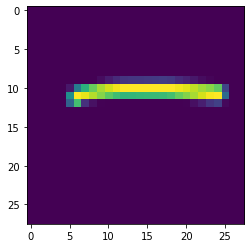

In [22]:
import numpy as np
from matplotlib import pyplot
from dataset import load_dataset
from random import randint

# Idea
# 1. load datasets
# 2. process pixels
# 3. intialize model
# 4. save model

categories = ['add','sub','mul','div']
labels = {
    'add' : '+',
    'sub' : '-',
    'mul' : '*',
    'div' : '/',
}

def load_all_datasets():
    # for category in categories:
#     train_x = load_dataset('train_x.npz')
#     train_y = load_dataset('train_y.npz')

#     index = randint(0,train_x.shape[0])
    
#     image_1d = np.array(train_x[index])
#     image_2d = image_1d.reshape(28,28)
#     pyplot.imshow(image_2d)
#     print('operator:',train_y[index])
#     print(image_2d.shape)
    
         
    test_x = load_dataset('test_x.npz')
    test_y = load_dataset('test_y.npz')
    
    index = randint(0,test_x.shape[0])
    
    image_1d = np.array(test_x[index])
    image_2d = image_1d.reshape(28,28)
    pyplot.imshow(image_2d)
    print('operator:',test_y[index])
    print(image_2d.shape)
    

def main():
    load_all_datasets()
    # 2. process pixels
    # 3. intialize model
    # 4. save model

if __name__ == "__main__" :
    main()

loaded test_x.npz: (229, 784)
loaded test_y.npz: (229,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.


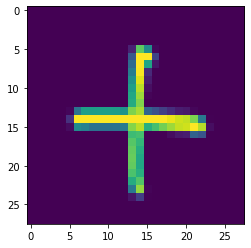

In [13]:
import joblib
from random import randint
from matplotlib import pyplot
import numpy as np
from dataset2 import load_dataset

# Idea
# 1. load datasets
# 2. load model
# 3. predict randomly

TRAIN_X = 'train_x.npz'
TRAIN_Y = 'train_y.npz'
TEST_X  = 'test_x.npz'
TEST_Y  = 'test_y.npz'
MODAL_NAME  = 'operators_svm_model.gz'

def load_test_dataset():
    """ 
    load and returns testing dataset and labels 
    returns :  test_x, test_y (all numpy arrays)
    """
    test_x = load_dataset(TEST_X)
    test_y = load_dataset(TEST_Y)
    return test_x, test_y

def pre_processing(test_x):
    """ 
    process test_x by convering int to float & normalizing pixels values to the range on 0-1 
    parameters : test_x (numpy array)
    returns    : test_norm (numpy array)
    """
    test_norm = test_x.astype('float32')
    test_norm = test_norm / 255.0
    return test_norm

def main():
    test_x, test_y = load_test_dataset()
    test_x = pre_processing(test_x)

    index = randint(0,test_x.shape[0] - 1)
        
    classifier = joblib.load(MODAL_NAME)
    print(test_x[index])
    result = classifier.predict([test_x[index]])
    
    # converting a single dimentional image array to 2 dimentional     
    image_1d = np.array(test_x[index])
    image_2d = image_1d.reshape(28,28)
    pyplot.imshow(image_2d)
    
    print('actual    :',test_y[index])
    print('predicted :',result[0])

if __name__ == "__main__" :
    main()